In [1]:
%reload_ext autoreload
%autoreload 2

from main.utils import funcs
import pandas as pd
import warnings
import mlflow
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# %reload_ext my_main_code.utils.funcs

/opt/homebrew/Caskroom/miniforge/base/envs/paper_miniforge_v2/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:23: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/opt/homebrew/Caskroom/miniforge/base/envs/paper_miniforge_v2/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:24: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
/opt/homebrew/Caskroom/miniforge/base/envs/paper_miniforge_v2/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:25: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
/opt/homebrew/Caskroom/miniforge/base/envs/paper_miniforge_v2/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:28: De

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> MLFlow setup </span>

In [2]:
mlflow_setup_main = funcs.AIM1_3_MLFLOW_SETUP(experiment_name='aim1_3_final_results')
run = mlflow_setup_main.get_simulation(run_name='Final_results', mlflow_mode='RE_RUNNING_OLD_SIMULATION', download_artifacts=False) # NEW_SIMULATION , RE_RUNNING_OLD_SIMULATION , LOADING_OLD_SIMULATION





************************************************
Access is restricted to AUTHORIZED USERS only! If
you are not authorized LEAVE NOW!
************************************************





setting the tracking URI
setting/creating the experiment


In [3]:
p = mlflow_setup_main.mlflow_ui(VIEW_PORT=6789)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Getting the simulation data for all databases </span>

In [4]:
aim1_3 = funcs.Aim1_3_Data_Analysis_Results(mlflow_setup=mlflow_setup_main , re_plot=True, download_artifacts=False , upload_artifact=False)
aim1_3.run_full_experiment_for_figures(mlflow_mode='LOADING_OLD_SIMULATION')





************************************************
Access is restricted to AUTHORIZED USERS only! If
you are not authorized LEAVE NOW!
************************************************



bind [::1]:5000: Address already in use
channel_setup_fwd_listener_tcpip: cannot listen to port: 5000
Could not request local forwarding.


setting the tracking URI
setting/creating the experiment


looping through datasets:   0%|          | 0/10 [00:00<?, ?it/s]

[2022-12-11 02:02:46 -0700] [18756] [INFO] Starting gunicorn 20.1.0
[2022-12-11 02:02:46 -0700] [18756] [INFO] Listening at: http://127.0.0.1:6789 (18756)
[2022-12-11 02:02:46 -0700] [18756] [INFO] Using worker: sync
[2022-12-11 02:02:46 -0700] [18757] [INFO] Booting worker with pid: 18757


In [5]:
# df = aim1_3.accuracy
# df

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Figures </span>

### <span style="font-family:PT Sans Narrow; font-size:1em"> Proposed method: Freq vs Beta </span>

In [6]:
import ipywidgets as widgets

comparison = widgets.Dropdown(options=['freq_vs_beta' , 'proposed_vs_proposed_penalized'], value='freq_vs_beta', description='Comparison:', disabled=False)
widgets.interact(aim1_3.paper_final_results_figure_technique, comparison=comparison)

interactive(children=(Dropdown(description='Comparison:', options=('freq_vs_beta', 'proposed_vs_proposed_penal…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [7]:
comparison = widgets.Dropdown(options=['freq_vs_beta' , 'proposed_vs_proposed_penalized' , 'proposed_penalized_vs_Tao' ], value='freq_vs_beta', description='Comparison:', disabled=False)
strategy = widgets.Dropdown(options=['freq' , 'beta' ], value='freq', description='strategy:', disabled=False)

widgets.interact(aim1_3.paper_final_results_statistical_table, comparison=comparison, strategy=strategy)

interactive(children=(Dropdown(description='Comparison:', options=('freq_vs_beta', 'proposed_vs_proposed_penal…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### <span style="font-family:PT Sans Narrow; font-size:1em"> Weight Strength Relation</span>

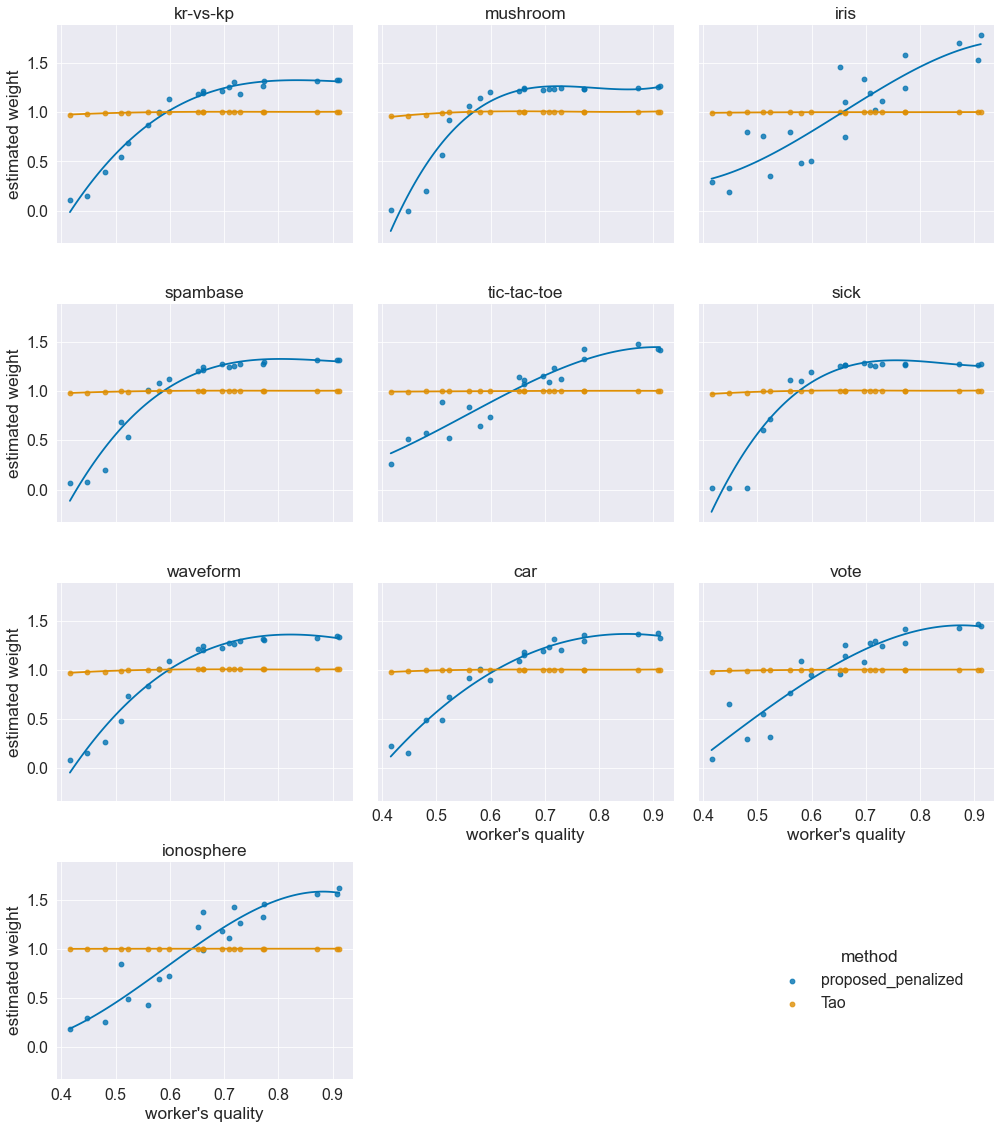

In [8]:
aim1_3.paper_final_results_figure_weight_quality_relation(font_scale=1.8)

In [9]:
# df_temp = df_weight_strength_relation.reset_index().melt(id_vars=['labelers_strength','dataset'], value_vars=['proposed_penalized', 'Tao'], var_name='method', value_name='weight')
# p = sns.relplot(x="worker strength", y="measured weight", col='dataset', hue='method', col_wrap=4, height=3, aspect=1.2, data=df_comparison_Tao_stacked, kind='line')
# p = sns.relplot(x="labelers_strength", y="weight", col='dataset', hue='method', col_wrap=4, height=3, aspect=1.2, data=df_temp, kind='scatter')

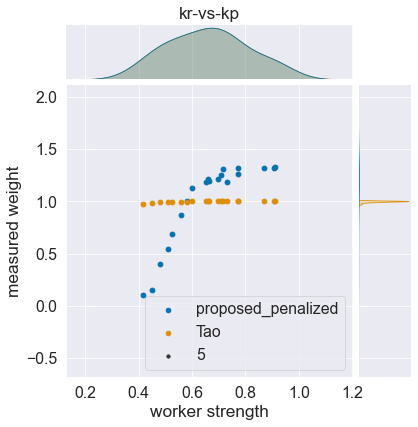

In [10]:
aim1_3.paper_final_results_figure_weight_quality_relation_detailed(dataset_index=1)

### <span style="font-family:PT Sans Narrow; font-size:1em"> Comparing to Tao & Sheng </span>

In [11]:
strategy = widgets.Dropdown(options=['freq' , 'beta' ], value='freq', description='strategy:', disabled=False)
widgets.interact(aim1_3.paper_final_results_figure_kde_proposed_penalized_vs_Tao_Sheng, strategy=strategy)

interactive(children=(Dropdown(description='strategy:', options=('freq', 'beta'), value='freq'), Output()), _d…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### <span style="font-family:PT Sans Narrow; font-size:1em"> Comparing to all Benchmarks </span>

In [16]:
strategy = widgets.Dropdown(options=['freq' , 'beta' ], description='strategy:', disabled=False)
dataset  = widgets.Dropdown(options=list( aim1_3.datasets_names.values() ), value='ionsphere' , description='dataset:', disabled=False)
widgets.interact(aim1_3.paper_final_results_figure_heatmap_all_benchmarks_different_workers, strategy=strategy, dataset=dataset)

interactive(children=(Dropdown(description='dataset:', options=('kr-vs-kp', 'mushroom', 'iris', 'spambase', 't…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [18]:
num_workers  = widgets.IntText(value=3, description='num_workers:', disabled=False)
strategy = widgets.Dropdown(options=['freq' , 'beta' ], description='strategy:', disabled=False)
widgets.interact(aim1_3.paper_final_results_figure_heatmap_all_benchmarks_different_datasets, num_workers=num_workers , strategy=strategy)

interactive(children=(Dropdown(description='strategy:', options=('freq', 'beta'), value='freq'), IntText(value…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Killing mlflow server </span>
```bash
pkill -f mlflow

In [ ]:
# closing the child mlflow session
mlflow.end_run()

# closing the ssh session
mlflow_setup_main.ssh_session.kill()

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Convert images to eps </span>

In [62]:
from PIL import Image
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff

# path to png figures
dir_figures = pathlib.Path('/Users/personal-macbook/Documents/PhD/code/my_main_code/my_main_code/aims/aim1_3_soft_weighted_mv/results/final_figures')

# Creating a subfolder for the ".eps" figures
dir_figures.joinpath('eps').mkdir(parents=True, exist_ok=True)

# list of png figures
img_list = list(dir_figures.glob('*.png'))


In [71]:
path_in = img_list[1]
im = plt.imread(path_in)

path_out = path_in.parent.joinpath('eps').joinpath(path_in.stem).as_posix() + '.tiff'

tiff.imwrite(path_out, im,  compression='PIXTIFF')

KeyError: "<COMPRESSION.LZW: 5> requires the 'imagecodecs' package"

In [36]:
path_out = path_in.parent.joinpath('eps').joinpath(path_in.stem).as_posix() + '.png'
plt.imsave(path_out,im[...,:3] , format='png', dpi=1200)

In [53]:
path_out = path_in.parent.joinpath('eps').joinpath(path_in.stem).as_posix() + '.eps'
# plt.imsave(path_out,(im[...,:3]*255).astype(np.uint8) , format='eps', dpi=1200, origin='lower')

minimum_points_per_line = 0.3
points = (np.array(im.shape)*minimum_points_per_line).astype(int).max()
plt.imsave(path_out,im[...,:3] , format='eps', dpi=1200)

TypeError: imsave() got an unexpected keyword argument 'points'

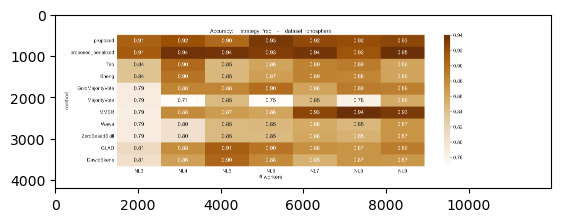